In [26]:
import numpy as np # linear algebra
import pandas as pd # data processing

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [27]:
import matplotlib.pyplot as plt # data visualization
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_recall_curve,roc_auc_score,classification_report, confusion_matrix, average_precision_score, auc

In [28]:
df=pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [30]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

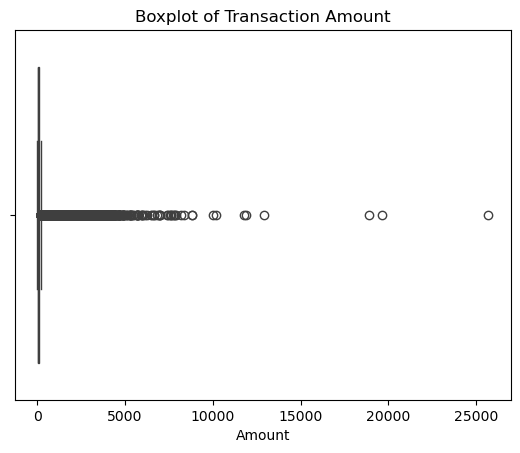

In [31]:
sns.boxplot(x="Amount",data=df)
plt.title('Boxplot of Transaction Amount')
plt.xlabel('Amount')
plt.show()

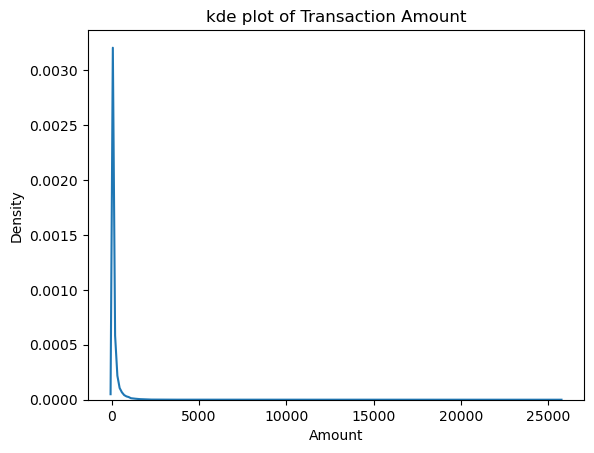

In [32]:
sns.kdeplot(x='Amount',data=df)
plt.title('kde plot of Transaction Amount')
plt.xlabel('Amount')
plt.show()

C:\Users\shivh\AppData\Local\Temp\ipykernel_14584\326233125.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['Class']==0]['Amount'],label='Non-Fraud', shade=True)


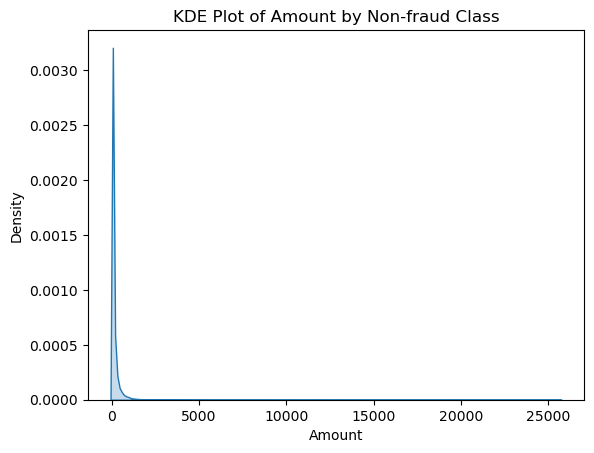

In [33]:
sns.kdeplot(data=df[df['Class']==0]['Amount'],label='Non-Fraud', shade=True)
plt.title('KDE Plot of Amount by Non-fraud Class')
plt.xlabel('Amount')
plt.show()

C:\Users\shivh\AppData\Local\Temp\ipykernel_14584\684757448.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['Class']==1]['Amount'],label='Fraud', shade=True)


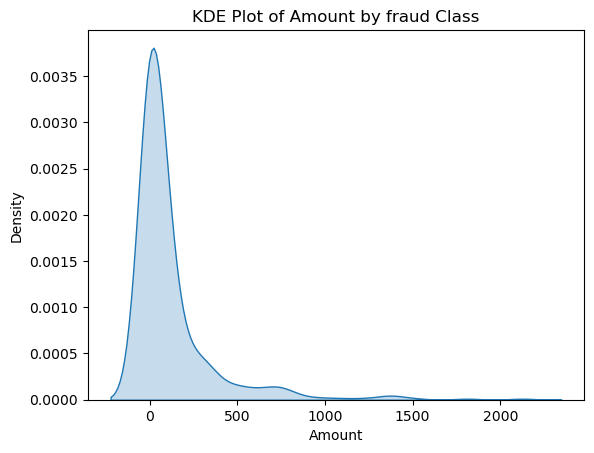

In [34]:
sns.kdeplot(data=df[df['Class']==1]['Amount'],label='Fraud', shade=True)
plt.title('KDE Plot of Amount by fraud Class')
plt.xlabel('Amount')
plt.show()

In [35]:
df['Hour'] = (df['Time'] // 3600) % 24
fraud_df=df[df['Class']==1]
fraud_count=fraud_df['Hour'].value_counts().sort_index()
fraud_count

Hour
0.0      6
1.0     10
2.0     57
3.0     17
4.0     23
5.0     11
6.0      9
7.0     23
8.0      9
9.0     16
10.0     8
11.0    53
12.0    17
13.0    17
14.0    23
15.0    26
16.0    22
17.0    29
18.0    33
19.0    19
20.0    18
21.0    16
22.0     9
23.0    21
Name: count, dtype: int64

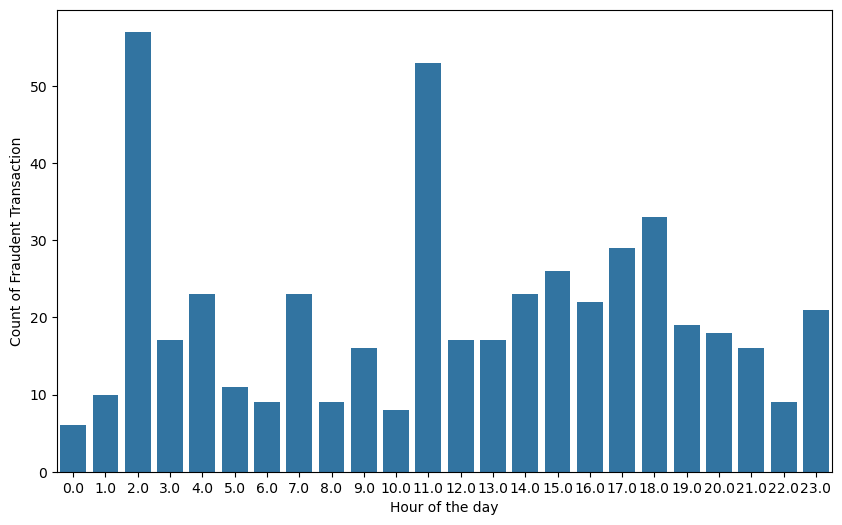

In [36]:
plt.figure(figsize=(10, 6))
sns.barplot(x=fraud_count.index,y=fraud_count.values)
plt.xlabel("Hour of the day")
plt.ylabel("Count of Fraudent Transaction")
plt.show()

In [37]:
df['Amount'] = np.log1p(df['Amount'])
scaler = StandardScaler()
df['ScaledAmount'] = scaler.fit_transform(df[['Amount']])
df['Hour_Scaled'] = scaler.fit_transform(df[['Hour']])
df.drop(columns=['Amount','Hour','Time'],inplace=True)
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,ScaledAmount,Hour_Scaled
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.124303,-2.40693
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-1.114639,-2.40693
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.682368,-2.40693
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.009339,-2.40693
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670241,-2.40693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0,-1.558093,1.53423
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0,0.059034,1.53423
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0,0.652027,1.53423
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0,-0.455313,1.53423


In [38]:
X=df.drop(columns=['Class'],axis=1)
y=df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
neg, pos = np.bincount(y_train)
scale_pos_weight = neg / pos
print(f"Scale pos weight: {scale_pos_weight}")

Scale pos weight: 577.2868020304569


In [39]:
model = XGBClassifier(
    scale_pos_weight=scale_pos_weight,
    n_estimators=100,
    learning_rate=0.1,
    max_depth=4,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

model.fit(X_train, y_train)

d:\Programs\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:32:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [40]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nROC AUC Score:", roc_auc_score(y_test, y_proba))
auprc = average_precision_score(y_test, y_proba)
print(f"AUPRC Score: {auprc:.4f}")

Confusion Matrix:
 [[56726   138]
 [   12    86]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.38      0.88      0.53        98

    accuracy                           1.00     56962
   macro avg       0.69      0.94      0.77     56962
weighted avg       1.00      1.00      1.00     56962


ROC AUC Score: 0.9798714153641197
AUPRC Score: 0.8412


In [41]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Original dataset shape:", y_train.value_counts())
print("Resampled dataset shape:", y_train_resampled.value_counts())

Original dataset shape: Class
0    227451
1       394
Name: count, dtype: int64
Resampled dataset shape: Class
0    227451
1    227451
Name: count, dtype: int64


In [42]:
model2 = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
model2.fit(X_train_resampled, y_train_resampled)

d:\Programs\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:32:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [43]:
y_pred2 = model2.predict(X_test)
y_proba2 = model2.predict_proba(X_test)[:, 1]  

In [44]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred2))
print("\nClassification Report:\n", classification_report(y_test, y_pred2))
auprc = average_precision_score(y_test, y_proba2)
print(f"AUPRC Score: {auprc:.4f}")

Confusion Matrix:
 [[56844    20]
 [   15    83]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.81      0.85      0.83        98

    accuracy                           1.00     56962
   macro avg       0.90      0.92      0.91     56962
weighted avg       1.00      1.00      1.00     56962

AUPRC Score: 0.8771


In [45]:
model3=LogisticRegression(random_state=42)
model3.fit(X_train_resampled, y_train_resampled)

LogisticRegression(random_state=42)

In [46]:
y_pred3 = model2.predict(X_test)
y_proba3 = model2.predict_proba(X_test)[:, 1]  

In [47]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred3))
print("\nClassification Report:\n", classification_report(y_test, y_pred3))
auprc = average_precision_score(y_test, y_proba3)
print(f"AUPRC Score: {auprc:.4f}")

Confusion Matrix:
 [[56844    20]
 [   15    83]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.81      0.85      0.83        98

    accuracy                           1.00     56962
   macro avg       0.90      0.92      0.91     56962
weighted avg       1.00      1.00      1.00     56962

AUPRC Score: 0.8771


In [48]:
model4=RandomForestClassifier(random_state=42)
model4.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [49]:
y_pred4 = model2.predict(X_test)
y_proba4 = model2.predict_proba(X_test)[:, 1] 

In [50]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred4))
print("\nClassification Report:\n", classification_report(y_test, y_pred4))
auprc = average_precision_score(y_test, y_proba4)
print(f"AUPRC Score: {auprc:.4f}")

Confusion Matrix:
 [[56844    20]
 [   15    83]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.81      0.85      0.83        98

    accuracy                           1.00     56962
   macro avg       0.90      0.92      0.91     56962
weighted avg       1.00      1.00      1.00     56962

AUPRC Score: 0.8771
